# CHRONIC KIDNEY DISEASE

# IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

# LOAD DATASET

In [2]:
data=pd.read_csv(r"D:\chronic\kidney_disease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Understanding_data_types_and_summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.drop(["id"],axis=1,inplace=True)

In [6]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
             'blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
              'white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease',
              'appetite','pedal_edema','anemia','class']

In [8]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [9]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Handling_the_missing_values

In [10]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [12]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'class', 'white_blood_cell_count', 'bacteria', 'packed_cell_volume', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'anemia', 'pus_cell', 'red_blood_cell_count', 'pedal_edema', 'pus_cell_clumps', 'red_blood_cells', 'appetite'}


In [14]:
for i in catcols:
    print("columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

columns : class
Counter({'ckd': 250, 'notckd': 150})
************************************************************************************************************************

columns : white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5, '8300': 5, '7900': 5, '8600': 5, '5600': 5, '10200': 5, '5000': 5, '8100': 5, '9500': 5, '6000': 4, '6200': 4, '10300': 4, '7700': 4, '5500': 4, '10400': 4, '6800': 4, '6500': 4, '4700': 4, '7300': 3, '4500': 3, '8400': 3, '6400': 3, '4200': 3, '7400': 3, '8000': 3, '5400': 3, '3800': 2, '11400': 2, '5300': 2, '8500': 2, '14600': 2, '7100': 2, '13200': 2, '9000': 2, '8200': 2, '15200': 2, '12400': 2, '12800': 2, '8800': 2, '5700': 2, '9300': 2, '6600': 2, '12100': 1, '12200': 1, '18900': 1, '21600': 1, '11300': 1, '\t6200': 1, '11800': 1, '12500': 1, '11900': 1, '12700': 1, 

In [15]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'class', 'bacteria', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'anemia', 'pus_cell', 'pedal_edema', 'pus_cell_clumps', 'red_blood_cells', 'appetite'}


In [16]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'hemoglobin', 'specific_gravity', 'blood_pressure', 'blood_urea', 'potassium', 'sugar', 'serum_creatinine', 'age', 'sodium', 'blood glucose random', 'albumin'}


In [17]:
for i in contcols:
    print("continous columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

continous columns : hemoglobin
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1,

In [18]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'hemoglobin', 'blood_pressure', 'blood_urea', 'potassium', 'serum_creatinine', 'age', 'sodium', 'blood glucose random'}


In [19]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'hemoglobin', 'blood_pressure', 'white_blood_cell_count', 'blood_urea', 'packed_cell_volume', 'potassium', 'serum_creatinine', 'age', 'sodium', 'red_blood_cell_count', 'blood glucose random'}


In [20]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'class', 'specific_gravity', 'bacteria', 'hypertension', 'coronary_artery_disease', 'sugar', 'diabetesmellitus', 'anemia', 'pus_cell', 'pedal_edema', 'albumin', 'pus_cell_clumps', 'red_blood_cells', 'appetite'}


In [21]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [22]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [23]:
# get unique values from categorical data's

for col in catcols:
    print(f"{col} has {data[col].unique()} values \n")

class has ['ckd' 'notckd'] values 

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

sugar has [ 0.  3.  4.  1. nan  2.  5.] values 

diabetesmellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

anemia has ['no' 'yes' nan] values 

pus_cell has ['normal' 'abnormal' nan] values 

pedal_edema has ['no' 'yes' nan] values 

albumin has [ 1.  4.  2.  3.  0. nan  5.] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

red_blood_cells has [nan 'normal' 'abnormal'] values 

appetite has ['good' 'poor' nan] values 



In [24]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [25]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [26]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [27]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [28]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [29]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

<AxesSubplot:>

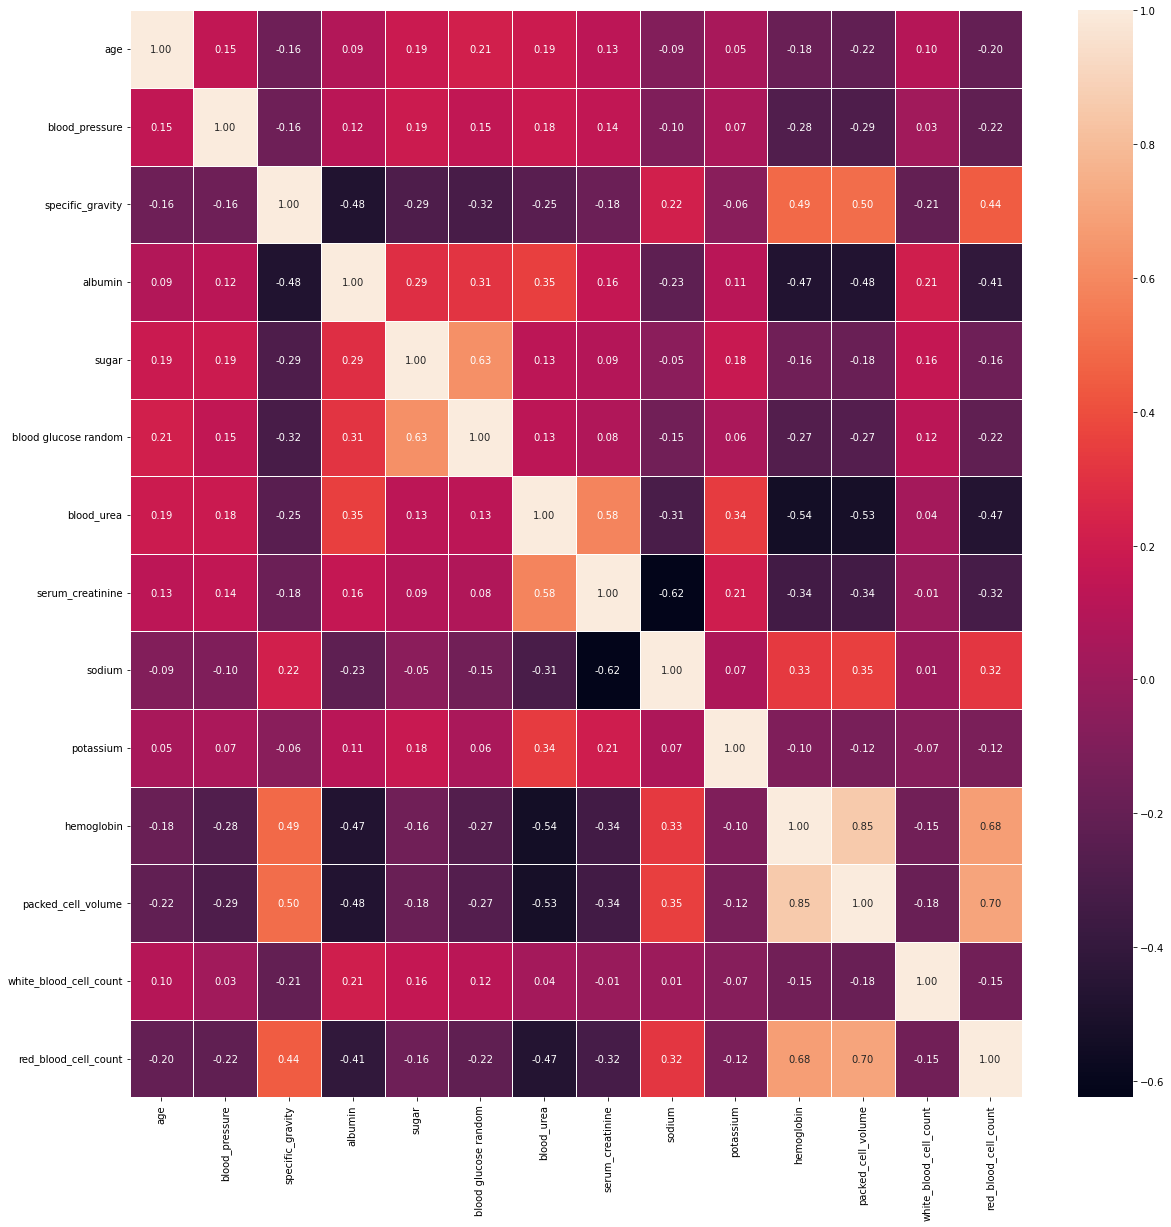

In [30]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [31]:
data.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.146830,-0.161959,0.087907,0.185221,0.213779,0.190669,0.128292,-0.086552,0.049315,-0.182737,-0.217882,0.099872,-0.202618
blood_pressure,0.146830,1.000000,-0.164422,0.122541,0.190218,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.292714,0.026067,-0.220822
specific_gravity,-0.161959,-0.164422,1.000000,-0.479962,-0.292053,-0.317893,-0.249370,-0.176146,0.217473,-0.063324,0.492143,0.501064,-0.206884,0.443741
albumin,0.087907,0.122541,-0.479962,1.000000,0.287751,0.310481,0.346935,0.160252,-0.228076,0.111614,-0.474211,-0.475165,0.207303,-0.411122
sugar,0.185221,0.190218,-0.292053,0.287751,1.000000,0.629809,0.126043,0.094565,-0.053452,0.180067,-0.156876,-0.181518,0.159034,-0.163871
blood glucose random,0.213779,0.149100,-0.317893,0.310481,0.629809,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.267580,0.121371,-0.222568
blood_urea,0.190669,0.183970,-0.249370,0.346935,0.126043,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,-0.525982,0.041510,-0.465930
serum_creatinine,0.128292,0.144359,-0.176146,0.160252,0.094565,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.341853,-0.005420,-0.323146
sodium,-0.086552,-0.103220,0.217473,-0.228076,-0.053452,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.346817,0.006334,0.316956
potassium,0.049315,0.066648,-0.063324,0.111614,0.180067,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606,-0.123264,-0.074048,-0.120456


In [32]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    ("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
Counter({0.0: 339, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3})
Counter({0: 339, 2: 18, 3: 14, 4: 13, 1: 13, 5: 3})
***********************

# DATA SPLITING 

# TRAIN AND TEST SET

In [33]:
selcols=['age','blood_urea','blood glucose random','coronary_artery_disease','anemia','pus_cell','red_blood_cells',
         'diabetesmellitus','pedal_edema']

x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 9)
(400, 1)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 9)
(320, 1)
(80, 9)
(80, 1)


In [35]:
x_train

,age,blood_urea,blood glucose random,coronary_artery_disease,anemia,pus_cell,red_blood_cells,diabetesmellitus,pedal_edema
205,61.0,28.0,100.000000,0,0,1,1,1,0
354,32.0,17.0,102.000000,0,0,1,1,0,0
3,48.0,56.0,117.000000,0,1,0,1,0,1
264,42.0,24.0,132.000000,0,0,1,1,0,0
194,80.0,49.0,148.036517,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
299,73.0,48.0,127.000000,0,0,1,1,0,0
22,48.0,163.0,95.000000,0,1,0,1,0,0
72,64.0,35.0,148.036517,0,0,0,1,1,1
15,40.0,162.0,76.000000,0,1,1,1,0,0


In [36]:
y_train

,class
205,0
354,1
3,0
264,1
194,0
...,...
299,1
22,0
72,0
15,0
